# Question 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

%matplotlib inline

In [2]:
dataset = pd.read_csv('Tahoe_Healthcare_Data.csv')

In [3]:
X = dataset.iloc[:,0:6]
y = dataset['readmit30']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## 1. Logistic Regression

In [5]:
#Logistic Regression
penalty = ['l1']
C = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]
param_grid = {'penalty':penalty, 'C':C}
scoring = 'accuracy'

logistic_model = LogisticRegression(random_state = 123)

grid_lr = GridSearchCV(cv=5, estimator=logistic_model, param_grid=param_grid, scoring= scoring)
grid_lr.fit(X, y)

print("Best Accuracy: %f using %s" %(grid_lr.best_score_, grid_lr.best_params_))
LR_tuned_model = grid_lr.best_estimator_
LR_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.803743 using {'C': 0.1, 'penalty': 'l1'}


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
y_pred = LR_tuned_model.predict(X_test)
y_proba = LR_tuned_model.predict_proba(X_test)

LR_fpr, LR_tpr, _ = roc_curve(y_true= y_test, y_score=y_proba[:, 1])
LR_roc_auc = auc(LR_fpr, LR_tpr)

## 2. CART

In [7]:
#CART
class_weight_set = [None, 'balanced']
max_depth_set = [3, 4, 5, 6, 7, 8, 9, 10]
params = {'max_depth':max_depth_set, 'class_weight':class_weight_set}
scoring = 'accuracy'

CART= DecisionTreeClassifier(random_state = 123)

grid_cart = GridSearchCV(cv=5, estimator=CART, param_grid=params, scoring=scoring)
grid_cart.fit(X_train, y_train)

print("Best Accuracy: %f using %s" %(grid_cart.best_score_, grid_cart.best_params_))
CART_tuned_model = grid_cart.best_estimator_
CART_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.786876 using {'class_weight': None, 'max_depth': 4}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [8]:
y_pred = CART_tuned_model.predict(X_test)
y_proba = CART_tuned_model.predict_proba(X_test)

CART_fpr, CART_tpr, _ = roc_curve(y_true= y_test, y_score=y_proba[:, 1])
CART_roc_auc = auc(CART_fpr, CART_tpr)

## 3. Random Forest

In [9]:
# RF
n_estimators_set = [100, 300, 500, 700, 900]
max_features_set = ['auto', 'sqrt']
max_depth_set = [5, 10, 20, 30]
min_samples_split_set = [2, 5, 10]
min_samples_leaf_set = [1, 2, 4]

scoring = 'accuracy'
params = {'n_estimators':n_estimators_set, 'max_features':max_features_set, 
          'max_depth': max_depth_set,'min_samples_split':min_samples_split_set,
          'min_samples_leaf': min_samples_leaf_set}

RF = RandomForestClassifier(random_state = 123)

grid_rf = GridSearchCV(cv = 5, estimator=RF, param_grid=params, scoring = scoring)
grid_rf.fit(X_train, y_train)

print("Best Accuracy: %f using %s" %(grid_rf.best_score_, grid_rf.best_params_))
RF_tuned_model = grid_rf.best_estimator_
RF_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.795720 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 700}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [10]:
y_pred = RF_tuned_model.predict(X_test)
y_proba = RF_tuned_model.predict_proba(X_test)

RF_fpr, RF_tpr, _ = roc_curve(y_true=y_test,y_score=y_proba[:, 1])
RF_roc_auc = auc(RF_fpr, RF_tpr)

## 4. Bagging

In [11]:
#Bagging
n_estimators_set = [100, 300, 500, 700, 900, 1100, 1300]
max_features_set = [1, 2, 3, 4, 5, 6]
scoring = 'accuracy'

params_set = {'n_estimators':n_estimators_set, 'max_features':max_features_set}

cart = DecisionTreeClassifier(random_state=123)
Bagging = BaggingClassifier(base_estimator=cart)

grid_bagging= GridSearchCV(cv=5, estimator=Bagging, param_grid = params_set, scoring=scoring)
grid_bagging.fit(X_train, y_train)

print("Best Accuracy: %f using %s" %(grid_bagging.best_score_, grid_bagging.best_params_))
Bagging_tuned_model = grid_bagging.best_estimator_
Bagging_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.784879 using {'max_features': 4, 'n_estimators': 100}


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=4,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [12]:
y_pred = Bagging_tuned_model.predict(X_test)
y_proba = Bagging_tuned_model.predict_proba(X_test)

Bagging_fpr, Bagging_tpr, _ = roc_curve(y_score=y_proba[:, 1], y_true=y_test)
Bagging_roc_auc = auc(Bagging_fpr, Bagging_tpr)

## 5. Model Comparison in Area Under Curve

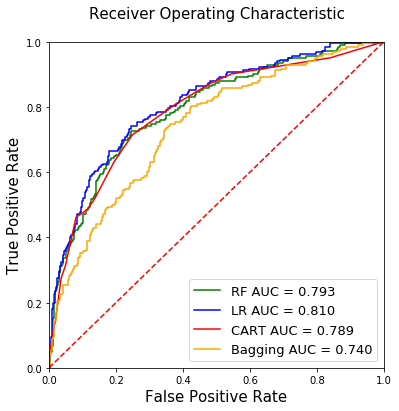


Area under Curve(AUC) in the testset

Random Forest : 0.793 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 700}
Logistic Regression : 0.810 using {'C': 0.1, 'penalty': 'l1'}
Decision Tree : 0.789 using {'class_weight': None, 'max_depth': 4}
Bagging : 0.740 using {'max_features': 4, 'n_estimators': 100}


In [13]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.title('Receiver Operating Characteristic\n', fontsize = 15)
plt.plot(RF_fpr, RF_tpr, 'g', label = 'RF AUC = %0.3f' % RF_roc_auc)
plt.plot(LR_fpr, LR_tpr, 'b', label = 'LR AUC = %0.3f' % LR_roc_auc)
plt.plot(CART_fpr, CART_tpr, 'r', label = 'CART AUC = %0.3f' % CART_roc_auc)
plt.plot(Bagging_fpr, Bagging_tpr, 'orange', label = 'Bagging AUC = %0.3f' %Bagging_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize =15)
plt.xlabel('False Positive Rate', fontsize = 15)
#plt.text(x = 0.41, y = 0.28, s='Logistic AUC = 0.79', fontsize = 15, color = 'b')
#plt.text(x = 0.4, y = 0.2, s='Severity AUC = 0.66', fontsize = 15, color = 'g')
plt.legend(fontsize = 13, loc = 'lower right')
plt.savefig('ROC_curve.png', bbox_inches='tight')
plt.show()
print("\nArea under Curve(AUC) in the testset\n")
print("Random Forest : %0.3f using %s" %(RF_roc_auc, grid_rf.best_params_))
print("Logistic Regression : %0.3f using %s" %(LR_roc_auc, grid_lr.best_params_))
print("Decision Tree : %0.3f using %s" %(CART_roc_auc, grid_cart.best_params_))
print("Bagging : %0.3f using %s" %(Bagging_roc_auc, grid_bagging.best_params_))

To find out the best classifier in the five fold cross-validation method, the grid search has been applied to optimise the parameters as above. As a result, by changing the seed, there are many turnovers between the random forest and logistic regression in terms of the area under curve. Although it is arduous to point out the best model among the four classifiers, there is a certain tendency that the two models always perform better than the deicision tree and bagging models. Furthermore, considering that the grid search for the random forest is required to make use of a lot more expensive computation than the other models, the logistic regression classifier is a better option to apply in view of the time-efficiency.

## Question 2

### i)

Normal approximation

### ii)

### iii)

### iV)

If each parking lot has a different capacity for parking, then the p hat could be biased. 

## Question 3

In [14]:
scafflaw_result = [{'x': 4, 'z':12}, {'x': 3, 'z':8}, {'x': 3, 'z':9}, 
                   {'x': 3, 'z':16}, {'x': 2, 'z':7}, {'x': 4, 'z':15},
                   {'x': 4, 'z':10}, {'x': 3, 'z':15}, {'x': 2, 'z':6},
                   {'x': 1, 'z':12}, {'x': 3, 'z':8}, {'x': 2, 'z':14}]

data_scff = pd.DataFrame(columns=['x', 'z'], data=scafflaw_result)

In [15]:
data_scff

,x,z
0,4,12
1,3,8
2,3,9
3,3,16
4,2,7
5,4,15
6,4,10
7,3,15
8,2,6
9,1,12


### i)

In [16]:
p_hat = data_scff.x.sum()/data_scff.z.sum()
print("p_hat: %0.3f" %(p_hat))

p_hat: 0.258


### ii)

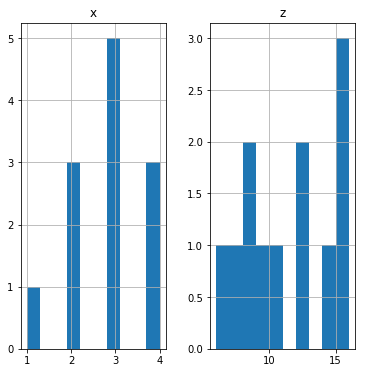

In [17]:
data_scff.hist()
plt.show()

### iii) Emperical Distribution

### iv)

In [18]:
proba_list = []
for i in range(1000):
    sampling = data_scff.sample(n = 12, replace = True)
    proba = sampling.x.sum()/sampling.z.sum()
    proba_list.append(proba)

print("Bootstrap : p_hat_b: %0.3f, std: %0.3f" %(np.mean(proba_list), np.std(proba_list)))
#original dataset
print("Original  : p_hat: %0.3f" %(data_scff.x.sum()/data_scff.z.sum()))

Bootstrap : p_hat_b: 0.260, std: 0.029
Original  : p_hat: 0.258


In [19]:
np.mean(proba_list) - p_hat

0.0026701173975421377

### V)

In [20]:
# confidence intervals
alpha = 0.95
ordered = np.sort(proba_list)
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(ordered, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(ordered, p))

print("p_hat at the 95%% Confidence interval: %0.3f < p_hat < %0.3f" %(lower, upper))

p_hat at the 95% Confidence interval: 0.204 < p_hat < 0.318


### Vi)

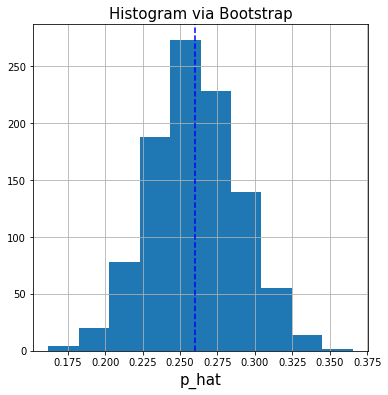

In [21]:
pd.DataFrame(proba_list).hist()
plt.axvline(x=[np.mean(proba_list)], color = 'b', linestyle='--')
plt.xlabel('p_hat', fontsize = 15)
plt.title('Histogram via Bootstrap', fontsize = 15)
#plt.text(x = 0.37, y = 230, s='p_hat: ', fontsize = 15, color = 'b')
#plt.text(x = 0.37, y = 200, s='Saving Cost = $503,200', fontsize = 15, color = 'b')
plt.show()